In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("housing.csv")

## Exploratory Data Analysis

In [3]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(20640, 10)
##################### Types #####################
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
##################### Head #####################
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximi

                 ocean_proximity      Ratio
ocean_proximity                            
<1H OCEAN                   9136  44.263566
INLAND                      6551  31.739341
NEAR OCEAN                  2658  12.877907
NEAR BAY                    2290  11.094961
ISLAND                         5   0.024225
##########################################


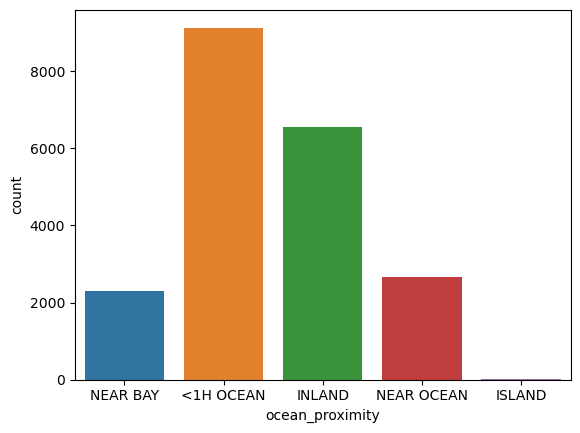

In [4]:
##################    Categorical Variable Analysis    #################

cat_col = [col for col in df.columns if df[col].dtypes == "O"]  

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
        
for col in cat_col:
    cat_summary(df, col, plot=True)  

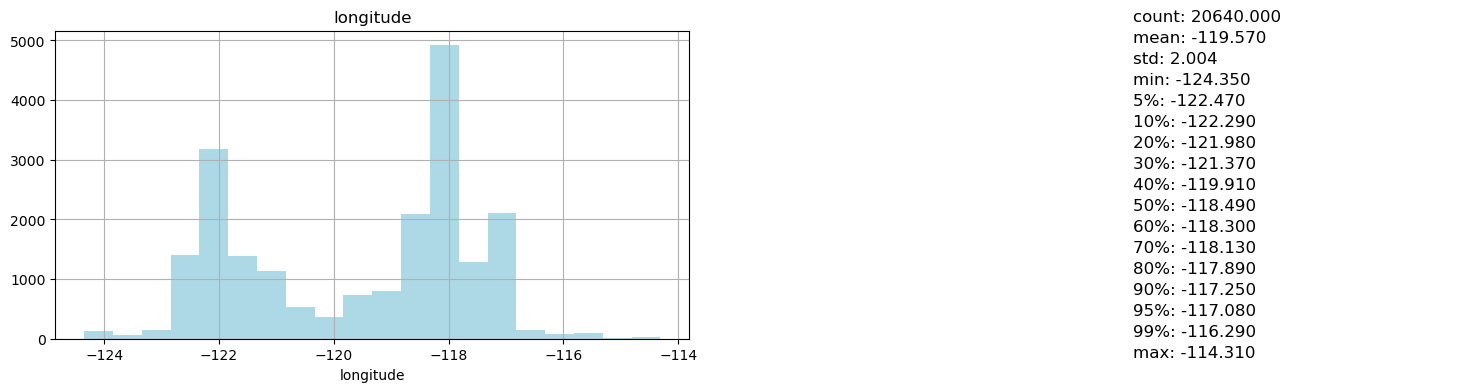

###########################################################################################


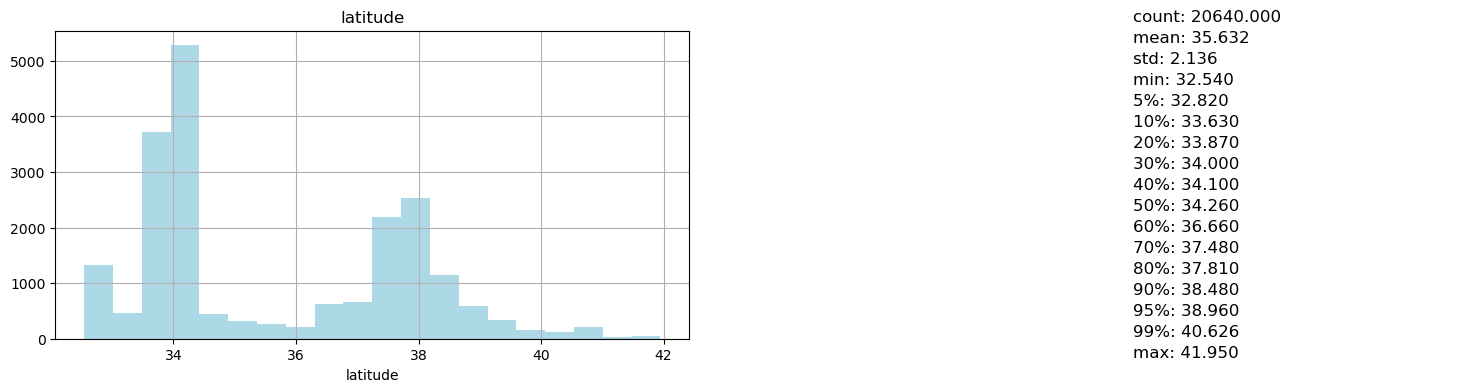

###########################################################################################


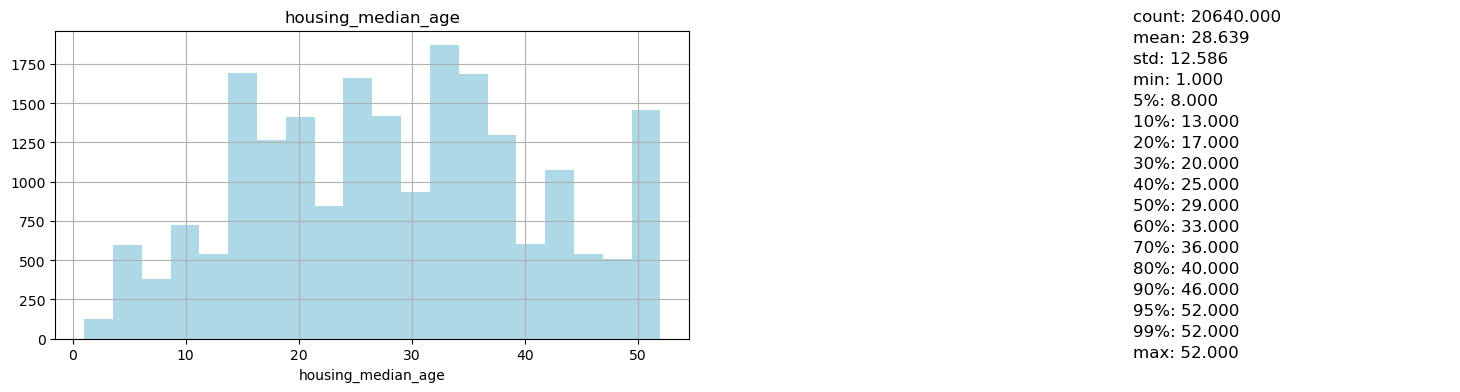

###########################################################################################


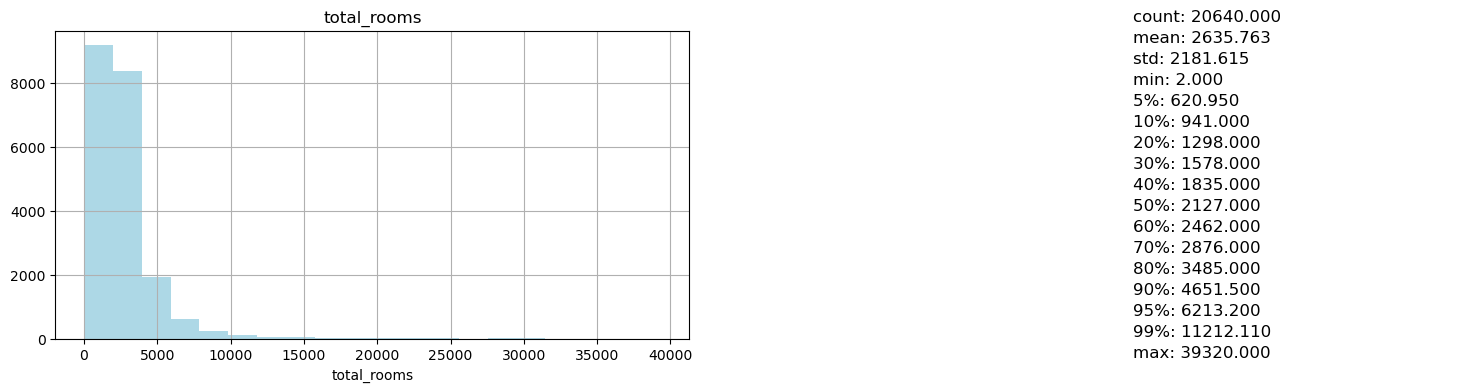

###########################################################################################


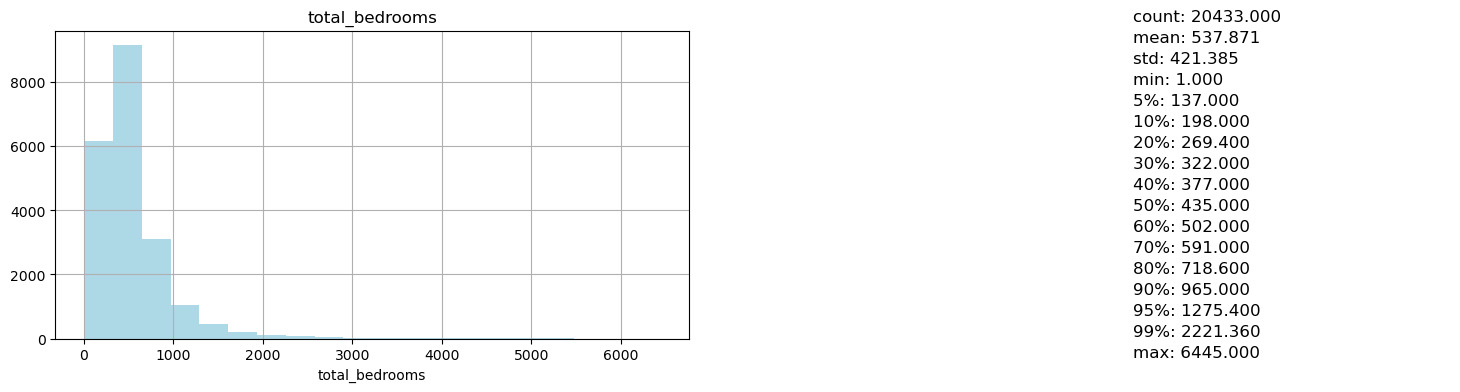

###########################################################################################


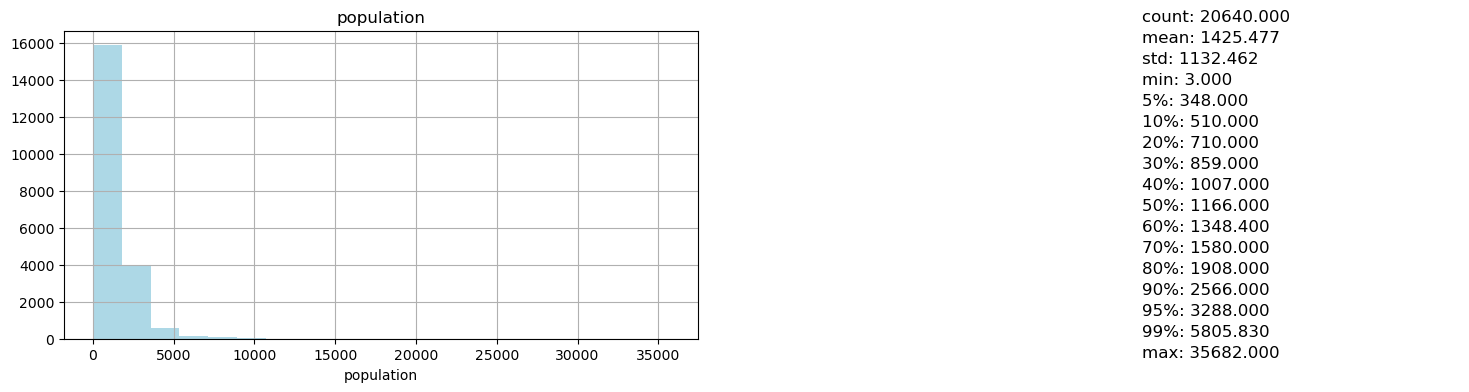

###########################################################################################


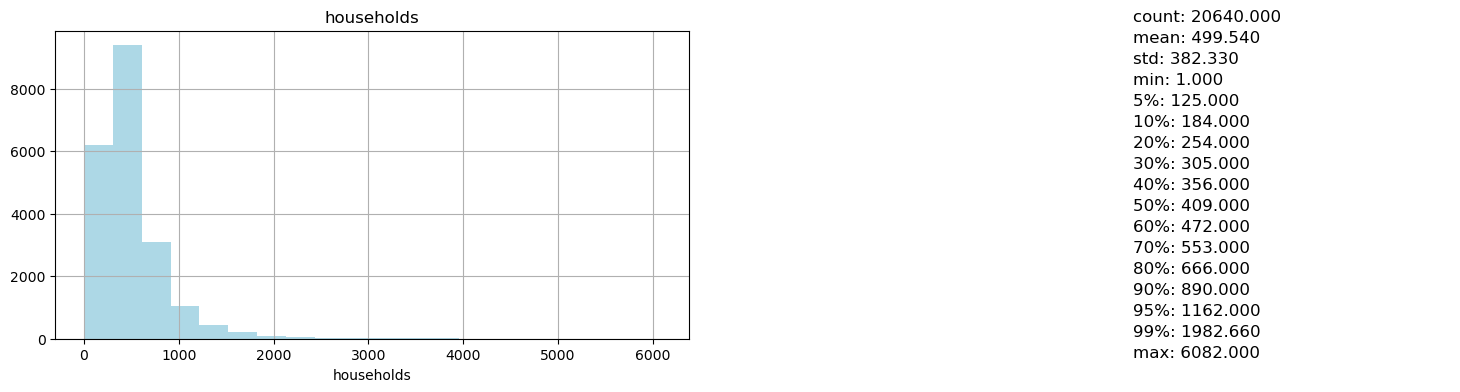

###########################################################################################


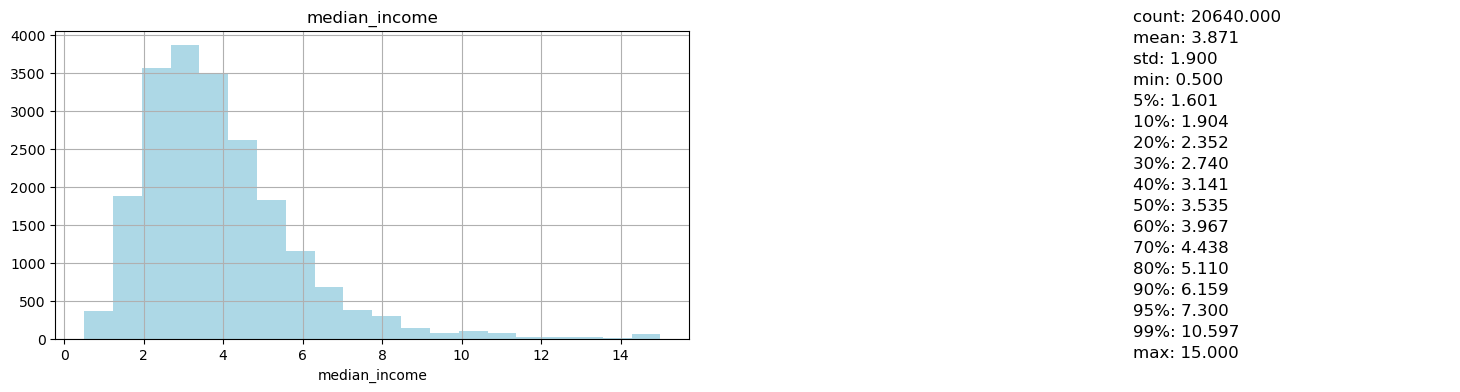

###########################################################################################


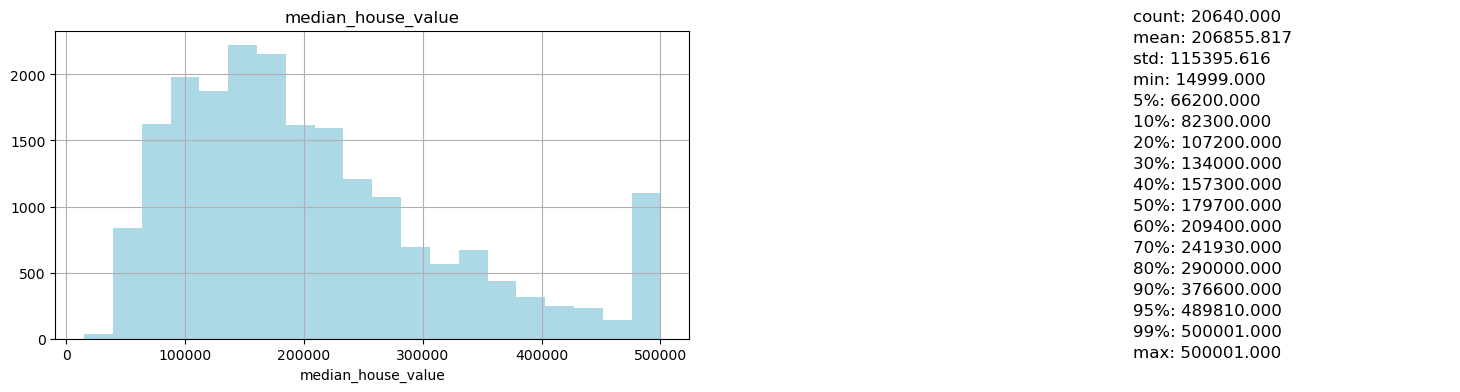

###########################################################################################


In [5]:
##################    Numerical Variable Analysis    #################

num_col = [col for col in df.columns if df[col].dtypes != "O"]

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    summary = dataframe[numerical_col].describe(quantiles)

    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(18, 4))
        
       
        dataframe[numerical_col].hist(bins=20, ax=axes[0], color="lightblue")
        axes[0].set_xlabel(numerical_col)
        axes[0].set_title(numerical_col)
        
        
        summary_text = "\n".join([f'{col}: {value:.3f}' for col, value in summary.items()])
        axes[1].text(0.5, 0.5, summary_text, fontsize=12, va='center', ha='left', linespacing=1.5)
        axes[1].axis('off')  # Hide axis for the summary table
        
        plt.show()
        print("###########################################################################################")

for col in num_col:
    num_summary(df, col, plot=True)

## Preparing the dataset

In [6]:
df = df.drop(df[(df.ocean_proximity != '<1H OCEAN') & (df.ocean_proximity != 'INLAND')].index)
df = df.drop('ocean_proximity', axis=1)

In [7]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


#### Question 1

There's one feature with missing values. What is it?

   - [ ] total_rooms
   - [x] total_bedrooms
   - [ ] population
   - [ ] households


In [8]:
df.isnull().sum()>0

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

#### Question 2

What's the median (50% percentile) for variable 'population'?

   - [ ] 995
   - [ ] 1095
   - [x] 1195
   - [ ] 1295

In [9]:
df['population'].median()

1195.0

### Preparing and Splitting the Dataset

In [10]:
df['median_house_value'] = np.log1p(df.median_house_value)

np.random.seed(42)

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuf = df.iloc[idx]

df_train = df_shuf.iloc[:n_train].copy()
df_val = df_shuf.iloc[n_train:n_train+n_val].copy()
df_test = df_shuf.iloc[n_train+n_val:].copy()

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

#### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good

In [11]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [12]:
def prepare_X(df, value):     
    df = df.fillna(value)   
    X = df.values
    return X

In [13]:
# fill with 0

X_train = prepare_X(df_train, value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, value=0)
y_pred = w_0 + X_val.dot(w)
print('RMSE:', round(rmse(y_val, y_pred), 2))

RMSE: 0.34


In [14]:
# fill with trainig mean

X_train = prepare_X(df_train, value=df_train.total_bedrooms.mean())
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, value=df_train.total_bedrooms.mean())
y_pred = w_0 + X_val.dot(w)
print('RMSE:', np.round(rmse(y_val, y_pred), 2))

RMSE: 0.34


#### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [15]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

X_train = prepare_X(df_train, value=0)
X_val = prepare_X(df_val, value=0)

options = [0, 0.000001, 0.001, 0.0001]

# Initializing variables to track the best RMSE and corresponding r
best_rmse = float('inf')
best_r = None

# Iterating through different regularization strengths
for r in options:
   
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    # Make predictions on the validation dataset
    y_pred = w0 + X_val.dot(w)
    
   
    current_rmse = rmse(y_val, y_pred)
    
    
    if current_rmse < best_rmse:
        best_rmse = current_rmse
        best_r = r


best_rmse = round(best_rmse, 2)

print(f"Best RMSE: {best_rmse} with r={best_r}")


Best RMSE: 0.34 with r=0


#### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?
- 0.5
- 0.05
- 0.005
- 0.0005

In [16]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0) 
    X = df_num.values
    return X

rmse_scores = []

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seed_values:
    # Splitting the data with the current seed
    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuf = df.iloc[idx]
    
    df_train = df_shuf.iloc[:n_train].copy()
    df_val = df_shuf.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuf.iloc[n_train+n_val:].copy()
    
    y_train = df_train.median_house_value.values
    y_val = df_val.median_house_value.values
    y_test = df_test.median_house_value.values
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    # Filling missing values with 0
    df_train.fillna(0, inplace=True)
    df_val.fillna(0, inplace=True)
    df_test.fillna(0, inplace=True)
    
    # Training a model without regularization
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    # Making predictions on the validation dataset
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    # Calculating RMSE
    current_rmse = rmse(y_val, y_pred)
    
    rmse_scores.append(current_rmse)

for seed, rmse in zip(seed_values, rmse_scores):
    print(f"For seed s = {seed}, the RMSE is: {rmse}")

std_deviation = np.std(rmse_scores)
print(f"Standard Deviation of RMSE scores: {std_deviation:.3f}")


For seed s = 0, the RMSE is: 0.33773871600705213
For seed s = 1, the RMSE is: 0.3377999353665313
For seed s = 2, the RMSE is: 0.3384287006758235
For seed s = 3, the RMSE is: 0.33200494683079923
For seed s = 4, the RMSE is: 0.33944518625559117
For seed s = 5, the RMSE is: 0.34338197052803987
For seed s = 6, the RMSE is: 0.3385330211777887
For seed s = 7, the RMSE is: 0.3468747697310249
For seed s = 8, the RMSE is: 0.3512736865974097
For seed s = 9, the RMSE is: 0.3341558266506152
Standard Deviation of RMSE scores: 0.005


#### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [17]:
np.random.seed(9)

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuf = df.iloc[idx]

df_train = df_shuf.iloc[:n_train].copy()
df_val = df_shuf.iloc[n_train:n_train+n_val].copy()
df_test = df_shuf.iloc[n_train+n_val:].copy()


df_combined = pd.concat([df_train, df_val])

df_combined.reset_index(drop=True, inplace=True)

del df_combined['median_house_value']
del df_test['median_house_value']

In [23]:
# Preparing the data for training
X_train_val = prepare_X(df_combined)
X_test = prepare_X(df_test)


w0, w = train_linear_regression_reg(X_train_val, np.concatenate([y_train, y_val]), r=0.001)

# Making predictions on the test dataset
y_pred_test = w0 + X_test.dot(w)

def calculate_rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

rmse_test = calculate_rmse(y_test, y_pred_test)
print(f"RMSE on the test dataset: {rmse_test:.2f}")

RMSE on the test dataset: 0.33
